Este será um projeto de aprimoramento de conteudos, durante este projeto irei trabalhar com o conjunto de dados, Sistema de Informações Hospitalares do SUS – SIHSUS.
Meu foco será apenas em analises de dados, após termianr o curso de data sciensce retornarei para ver o que consigo fazer com estes dados



Objetivo principal: Quais são as maiores causas de internamentos em cada tipo de leito e uti, quais deles podem ser prevenidos através do programa da Saúde e familia.

Objetivo secundario: uma proposta para tratar de um dos tipos de internamentos que não são tratados atráves do PSF.  

ressaltando que a pandemia não gera mais internamentos nos dias atuais, com isso em mente, os dados relacionados a covid 19 serão excluidos

Dados do Sistema de Informações Hospitalares do SUS (SIHSUS) reunidos pela Plataforma de Ciência de Dados aplicada à Saúde (PCDaS). Os dados foram obtidos junto ao DATASUS (Ministério da Saúde), tratados e enriquecidos seguindo uma metodologia própria de ETL (processo de extração, transformação e carga dos dados) da PCDaS, resultando em um dataset mensal com todos os registros de internações hospitalares contidos no SIHSUS à partir de janeiro de 2008. A atualização dos dados é realizada pelo DATASUS e a PCDaS extrai os registros mensais referentes aos arquivos RD_UF_ANO_MÊS.dbc (Reduzidos de AIH) assim que disponibilizados. As colunas com nomes em MAIÚSCULO representam dados originais advindos do DATASUS e colunas com nomes iniciando em minúsculo representam dados resultantes de transformação ou enriquecimento.

https://pcdas.icict.fiocruz.br/conjunto-de-dados/sistema-de-informacoes-hospitalares-do-sus-sihsus/dicionario-de-variaveis/


#rodar tudo

In [ ]:

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as ps
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import dask.dataframe as dd
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

pd.options.display.max_columns = None


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
caminho=[]
for ano in range(2014,2025):
  for i in range(1,13):
    if i < 13:

      if ano>2018 and ano<2024:
        way= f'/content/drive/MyDrive/projeto_internação/ETLSIH.ST_BA_{ano}_{i}_t.csv'
        caminho.append(way)
        if ano == 2024:
          break



pib_ba='/content/drive/MyDrive/projeto_internação/pib_total_per_capita.xls'
way_has='/content/drive/MyDrive/projeto_internação/indicador has.csv'
way_dm='/content/drive/MyDrive/projeto_internação/indicador diabetes.csv'


In [ ]:
indicadores=['Proporção de pessoas com hipertensão, com consulta e pressão arterial aferida no semestre', 'Proporção de pessoas com diabetes, com consulta e hemoglobina glicada solicitada no semestre']
df_has=pd.read_csv(way_has, sep=';')
df_dm=pd.read_csv(way_dm, sep=';')
df_hiperdia=pd.concat([df_has, df_dm])
df_hiperdia['indicadores']=indicadores
df_hiperdia.set_index('indicadores', inplace=True)
df_hiperdia.drop(columns=['Unnamed: 10', 'Estado', 'UF'], inplace=True)

periodo=['2022 q1', '2022 q2', '2022 q3', '2023 q1', '2023 q2', '2023 q3', '2024 q1', '2024 q2' ]

df_hiperdia

,2022 Q1 (%),2022 Q2 (%),2022 Q3 (%),2023 Q1 (%),2023 Q2 (%),2023 Q3 (%),2024 Q1 (%),2024 Q2 (%)
indicadores,,,,,,,,
"Proporção de pessoas com hipertensão, com consulta e pressão arterial aferida no semestre",18,24,26,27,30,31,31,30
"Proporção de pessoas com diabetes, com consulta e hemoglobina glicada solicitada no semestre",13,21,24,24,28,29,31,28


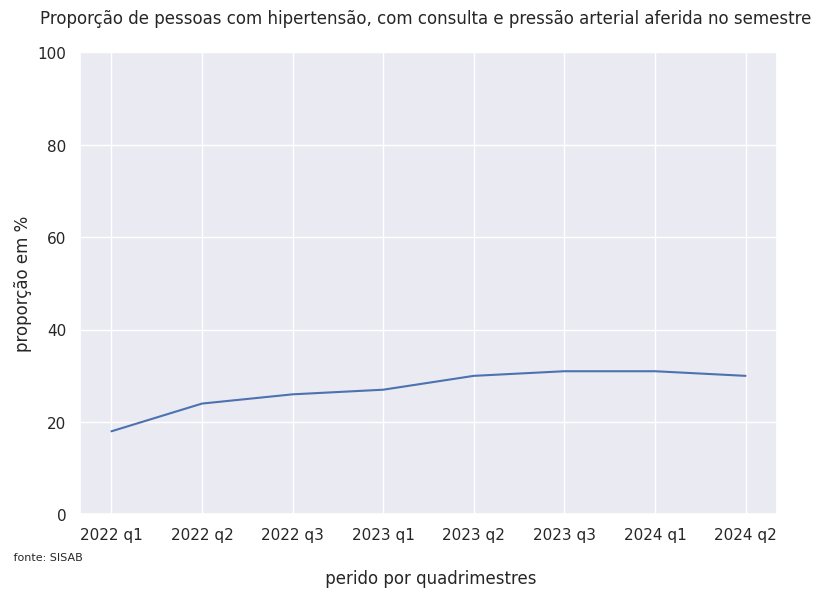

In [ ]:
sns.set_theme(style="darkgrid")
fig,ax= plt.subplots(figsize=(9,6))
plt.xlabel('\n perido por quadrimestres')
plt.ylabel('proporção em %')
plt.ylim(0,100)
plt.title('Proporção de pessoas com hipertensão, com consulta e pressão arterial aferida no semestre \n')
plt.text(x=-0.1, y=-0.1, s='\n fonte: SISAB', fontsize=8, transform=ax.transAxes)


sns.lineplot(x=periodo, y=df_hiperdia.loc['Proporção de pessoas com hipertensão, com consulta e pressão arterial aferida no semestre'])
plt.show()

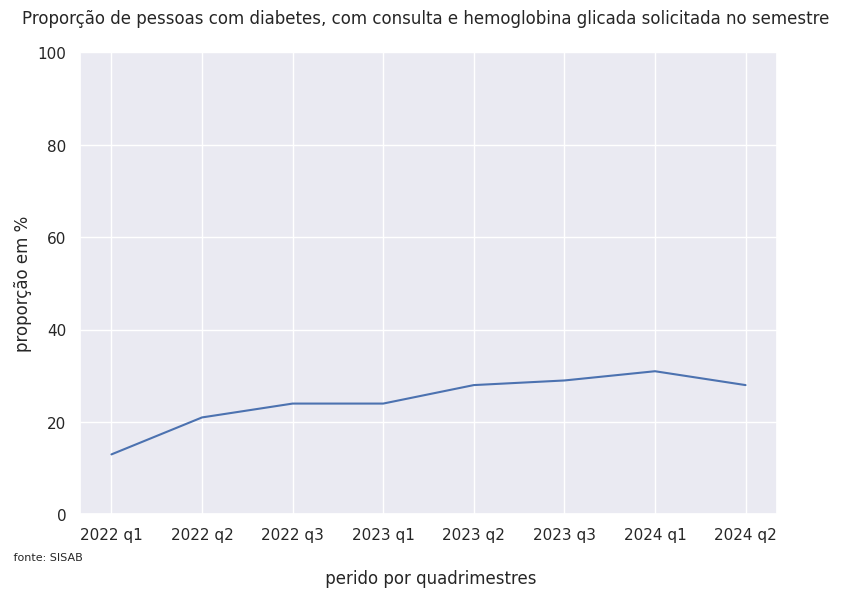

In [ ]:
sns.set_theme(style="darkgrid")
fig,ax= plt.subplots(figsize=(9,6))
plt.xlabel('\n perido por quadrimestres')
plt.ylabel('proporção em %')
plt.ylim(0,100)
plt.title('Proporção de pessoas com diabetes, com consulta e hemoglobina glicada solicitada no semestre \n')
plt.text(x=-0.1, y=-0.1, s='\n fonte: SISAB', fontsize=8, transform=ax.transAxes)


sns.lineplot(x=periodo, y=df_hiperdia.loc['Proporção de pessoas com diabetes, com consulta e hemoglobina glicada solicitada no semestre'])
plt.show()

In [ ]:
df_piba=pd.read_excel(pib_ba)
df_piba['ANOS']=df_piba['ANOS'].astype(int)
filtro_y=df_piba['ANOS']>=2019
df_piba=df_piba[filtro_y]
df_piba

,ANOS,PIB Total (Valores Correntes - R$ Milhão),Índice do PIB Real (2002 = 100),Taxa de crescimento do PIB (%),População (Habitantes),"PIB Per Capita (Valores Correntes R$ 1,00)",Índice do PIB Per Capita Real (2002 = 100),Taxa do PIB Per Capita (%),Coluna1
17,2019,293240.50,142.68,0.79,14873064,19716.21,126.99,0.38,NaN
18,2020,305320.81,136.44,-4.37,14930634,20449.29,120.94,-4.76,NaN
19,2021,352617.85,140.55,3.01,14985284,23530.94,124.14,2.64,NaN
20,2022,402646.61,146.48,4.22,14136417,28482.93,136.40,9.88,NaN
21,2023,427472.67,149.01,1.73,-,-,-,-,NaN


In [ ]:
df_periodo_pib= df_piba.groupby(['ANOS'], as_index=True)['PIB Total  (Valores Correntes - R$ Milhão)'].sum()
df_periodo_pib

,PIB Total (Valores Correntes - R$ Milhão)
ANOS,
2019,293240.50
2020,305320.81
2021,352617.85
2022,402646.61
2023,427472.67


In [ ]:
df_unificado = dd.read_csv(caminho, assume_missing=True)


dtypes = {
    'AUD_JUST': 'object',
    'CID_NOTIF': 'object',
    'DIAGSEC2': 'object',
    'DIAGSEC3': 'object',
    'DIAGSEC4': 'object',
    'SIS_JUST': 'object',
    'def_aglr_int': 'object',
    'def_aglr_res': 'object',
    'def_faec_tp': 'object',
    'def_reg_metr_int': 'object',
    'def_reg_metr_res': 'object',
    'def_tpdisec2': 'object',
    'def_tpdisec3': 'object',
    'def_tpdisec4': 'object',
    'DIAGSEC5': 'object',
    'def_tpdisec5': 'object',
    'DIAGSEC6': 'object',
    'def_tpdisec6': 'object',
    'DIAGSEC7': 'object',
    'def_tpdisec7': 'object',
    'def_cna':'object',
    'def_cnae':'object',
    'DIAGSEC1': 'object',
    'def_tpdisec1': 'object'



}

# Criar o dataframe com os tipos de dados especificados
df_unificado = dd.read_csv(caminho, dtype=dtypes, assume_missing=True)



In [ ]:
df_unificado

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,COBRANCA,NATUREZA,NAT_JUR,GESTAO,RUBRICA,IND_VDRL,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,NUM_PROC,CAR_INT,TOT_PT_SP,CPF_AUT,HOMONIMO,NUM_FILHOS,INSTRU,CID_NOTIF,CONTRACEP1,CONTRACEP2,GESTRISCO,INSC_PN,SEQ_AIH5,CBOR,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_CPF,GESTOR_DT,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9,res_MUNCOD,res_MUNNOME,res_MUNNOMEX,res_AMAZONIA,res_FRONTEIRA,res_CAPITAL,res_MSAUDCOD,res_RSAUDCOD,res_CSAUDCOD,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_codigo_adotado,res_SIGLA_UF,res_CODIGO_UF,res_NOME_UF,res_REGIAO,int_MUNCOD,int_MUNNOME,int_MUNNOMEX,int_AMAZONIA,int_FRONTEIRA,int_CAPITAL,int_MSAUDCOD,int_RSAUDCOD,int_CSAUDCOD,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,int_codigo_adotado,int_SIGLA_UF,int_CODIGO_UF,int_NOME_UF,int_REGIAO,res_coordenadas,int_coordenadas,def_cod_idade,def_idade_anos,def_idade_meses,def_idade_dias,codidade,dt_inter,dt_saida,dia_semana_internacao,dia_semana_saida,ano_internacao,ano_saida,mes_internacao,mes_saida,def_reg_metr_res,def_reg_metr_int,def_cir_res,def_cir_int,def_aglr_res,def_aglr_int,def_meso_res,def_meso_int,def_micro_res,def_micro_int,def_rsaud_res,def_rsaud_int,def_csaud_res,def_csaud_int,def_procedimento_realizado,def_procedimento_solicitado,def_esferajur,def_etnia,def_nacionalidade,def_cbo,def_cnae,def_leitos,def_diag_princ_cap,def_diag_secun_cap,def_diag_princ_grupo,def_diag_secun_grupo,def_diag_princ_cat,def_diag_secun_cat,def_diag_princ_subcat,def_diag_secun_subcat,def_uti_mes_to,def_seq_aih5,def_ident,def_vincprev,def_regime,def_regct,def_faec_tp,def_car_int,def_sexo,def_marca_uti,def_cobranca,def_nat_jur,def_gestao,def_ind_vdrl,def_morte,def_homonimo,def_instru,def_contracep1,def_contracep2,def_gestrisco,def_infehosp,def_complex,def_financ,def_raca_cor,def_marca_uci,def_tpdisec1,def_tpdisec2,def_tpdisec3,def_tpdisec4,def_tpdisec5,def_tpdisec6,def_tpdisec7,def_tpdisec8,def_tpdisec9,def_identific,def_n_aih,def_idade_bas,def_idade_pub,def_idade_18,def_num_filhos,def_dias_perm
npartitions=61,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,string,string,string,float64,float64,float64,float64,float64,float64,string,string,string,string,string,string,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,string,string,string,string,string,float64,float64,float64,float64,float64,float64,float64,float64,string,float64,string,string,float64,string,string,string,string

In [ ]:
df_escolhidos=df_unificado[['def_sexo', 'ano_internacao', 'DIAG_PRINC', 'def_idade_anos', 'def_leitos', 'def_marca_uti', 'def_diag_princ_cat', 'def_diag_princ_cap', 'def_diag_princ_grupo', 'VAL_TOT', 'US_TOT', 'N_AIH']].compute()
df_escolhidos['ano_internacao']=df_escolhidos['ano_internacao'].astype(int)



In [ ]:
#por conta de algum bug o groupby para a coluna ano_internacao n funcionou direito, ent eu tive que contorna-lo
df_ano=df_escolhidos[['ano_internacao', 'def_diag_princ_cat']]
filtro_avc= df_ano['def_diag_princ_cat']=='I64 Acid vasc cerebr NE como hemorrag isquemico'
df_ano=df_ano[filtro_avc]
filtro_y=df_ano['ano_internacao']>=2019
df_ano=df_ano[filtro_y]
df_ano=df_ano.groupby(['ano_internacao'])['def_diag_princ_cat'].count()
df_ano

,def_diag_princ_cat
ano_internacao,
2019,13743
2020,12794
2021,14117
2022,15161
2023,14055


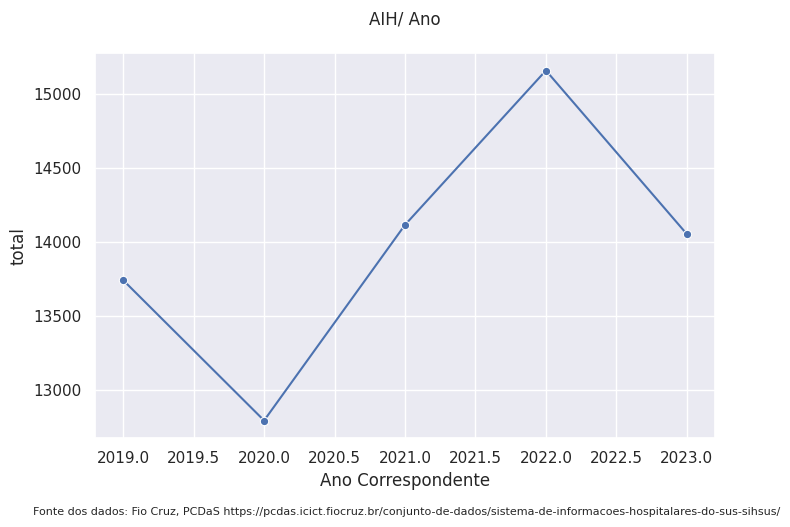

In [ ]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('AIH/ Ano\n')
plt.ylabel('total')
plt.xlabel('Ano Correspondente')

sns.lineplot(x=df_ano.index, y=df_ano.values, marker='o', ax=ax)
plt.text(x=-0.1, y=-0.2, s='\nFonte dos dados: Fio Cruz, PCDaS https://pcdas.icict.fiocruz.br/conjunto-de-dados/sistema-de-informacoes-hospitalares-do-sus-sihsus/',
         fontsize=8, transform=ax.transAxes)

plt.show()

In [ ]:

df_escolhidos['def_diag_princ_cat'].value_counts().head(7)


,count
def_diag_princ_cat,
O80 Parto unico espontaneo,410557
B34 Doenc p/virus de localiz NE,87000
A49 Infecc bacter de localiz NE,83909
J18 Pneumonia p/microorg NE,79188
O82 Parto unico p/cesariana,78153
K80 Colelitiase,78044
I64 Acid vasc cerebr NE como hemorrag isquemico,70852


In [ ]:
df_diag=df_escolhidos['def_diag_princ_cat'].value_counts()
df_diag.head(10)

,count
def_diag_princ_cat,
O80 Parto unico espontaneo,410557
B34 Doenc p/virus de localiz NE,87000
A49 Infecc bacter de localiz NE,83909
J18 Pneumonia p/microorg NE,79188
O82 Parto unico p/cesariana,78153
K80 Colelitiase,78044
I64 Acid vasc cerebr NE como hemorrag isquemico,70852
I50 Insuf cardiaca,66578
Z30 Anticoncepcao,64669


In [ ]:
df_10_plus=df_diag.head(10)
df_10_plus
novo_indice = df_10_plus.index.to_list()
novo_indice[6] = 'I64 AVC NE como h ou i'
df_10_plus.index = novo_indice
df_10_plus

,count
O80 Parto unico espontaneo,410557
B34 Doenc p/virus de localiz NE,87000
A49 Infecc bacter de localiz NE,83909
J18 Pneumonia p/microorg NE,79188
O82 Parto unico p/cesariana,78153
K80 Colelitiase,78044
I64 AVC NE como h ou i,70852
I50 Insuf cardiaca,66578
Z30 Anticoncepcao,64669
K40 Hernia inguinal,60892


In [ ]:
df_gastos=df_escolhidos.groupby(['def_diag_princ_cat'], as_index=False)[['VAL_TOT', 'US_TOT']].sum().sort_values(by='VAL_TOT', ascending=False)
df_gastos.set_index('def_diag_princ_cat', inplace=True)
df_gastos

filtro_avc=df_gastos.index=='I64 Acid vasc cerebr NE como hemorrag isquemico'
df_gastos=df_gastos.head(10)

df_gastos


,VAL_TOT,US_TOT
def_diag_princ_cat,,
B34 Doenc p/virus de localiz NE,536014154.41,101562598.06
O80 Parto unico espontaneo,214930295.93,44210332.40
A49 Infecc bacter de localiz NE,147490567.37,29967784.77
I21 Infarto agudo do miocardio,142692261.03,28857244.92
N18 Insuf renal cronica,136096402.51,27671335.26
I50 Insuf cardiaca,115162591.14,23469712.92
I64 Acid vasc cerebr NE como hemorrag isquemico,103108512.01,20893074.71
I20 Angina pectoris,85154410.20,17414251.48
A41 Outr septicemias,83569575.65,16944356.74


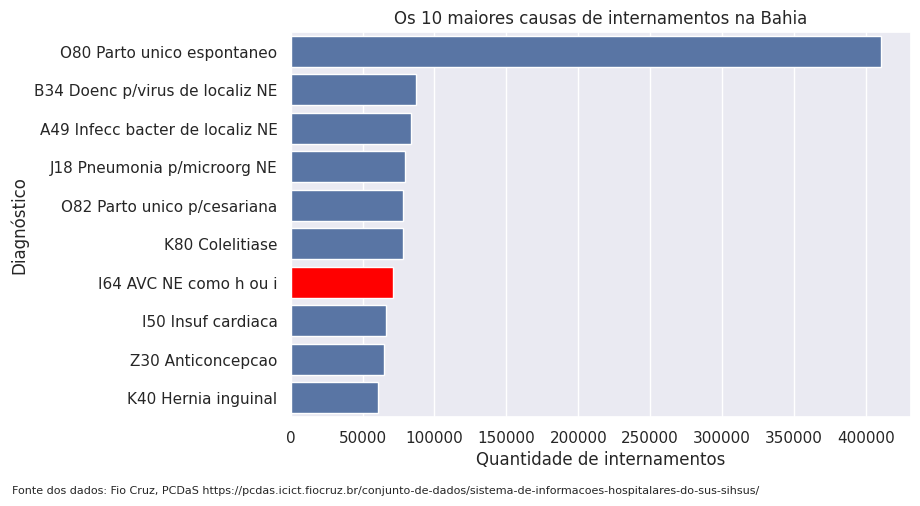

In [ ]:
sns.set_theme(style="darkgrid")
fig,ax= plt.subplots(figsize=(8,5))
plt.title('Os 10 maiores causas de internamentos na Bahia')
plt.ylabel('Diagnóstico')
plt.xlabel('Quantidade de internamentos')
sns.barplot(x=df_10_plus.values, y=df_10_plus.index,ax=ax)
highlight = 6
bars = ax.patches
bars[highlight].set_facecolor('red')
plt.text(x=-0.45, y=-0.2, s='Fonte dos dados: Fio Cruz, PCDaS https://pcdas.icict.fiocruz.br/conjunto-de-dados/sistema-de-informacoes-hospitalares-do-sus-sihsus/',
         fontsize=8, transform=ax.transAxes)
plt.show()

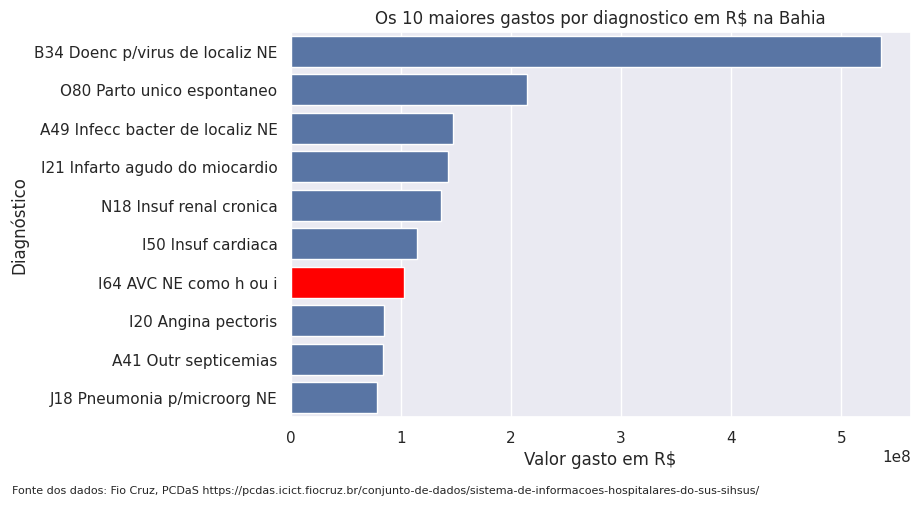

In [ ]:
novo_indice2 = df_gastos.index.to_list()
novo_indice2[6] = 'I64 AVC NE como h ou i'
df_gastos.index = novo_indice2


sns.set_theme(style="darkgrid")
fig,ax= plt.subplots(figsize=(8,5))
plt.title('Os 10 maiores gastos por diagnostico em R$ na Bahia')
plt.ylabel('Diagnóstico')
plt.xlabel('Valor gasto em R$')
sns.barplot(x=df_gastos['VAL_TOT'], y=df_gastos.index,ax=ax)
highlight = 6
bars = ax.patches


bars[highlight].set_facecolor('red')
plt.text(x=-0.45, y=-0.2, s='Fonte dos dados: Fio Cruz, PCDaS https://pcdas.icict.fiocruz.br/conjunto-de-dados/sistema-de-informacoes-hospitalares-do-sus-sihsus/',
         fontsize=8, transform=ax.transAxes)
plt.show()

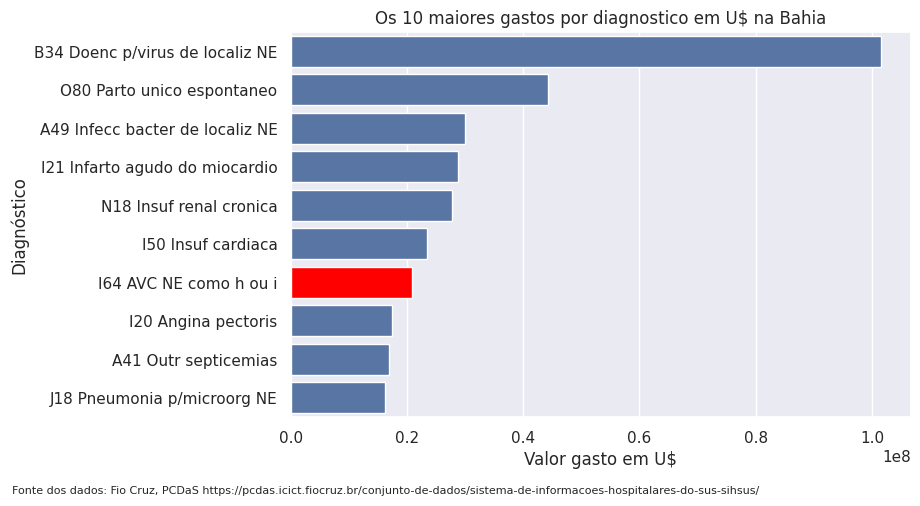

In [ ]:
sns.set_theme(style="darkgrid")
fig,ax= plt.subplots(figsize=(8,5))
plt.title('Os 10 maiores gastos por diagnostico em U$ na Bahia')
plt.ylabel('Diagnóstico')
plt.xlabel('Valor gasto em U$')
sns.barplot(x=df_gastos['US_TOT'], y=df_gastos.index,ax=ax)
highlight = 6
bars = ax.patches

bars[highlight].set_facecolor('red')
plt.text(x=-0.45, y=-0.2, s='Fonte dos dados: Fio Cruz, PCDaS https://pcdas.icict.fiocruz.br/conjunto-de-dados/sistema-de-informacoes-hospitalares-do-sus-sihsus/',
         fontsize=8, transform=ax.transAxes)

plt.show()

In [ ]:
# somatorio_pib=df_periodo_pib['PIB Total  (Valores Correntes - R$ Milhão)'].values.sum()*1000
# somatorio_avc_g=df_gastos['VAL_TOT'].values.sum()
# somatorio_pib
#1 bilhão 781 milhoes 298 mil 440 reais e 83 centavos.

In [ ]:
df_gastos2=df_escolhidos[[ 'def_diag_princ_cat', 'VAL_TOT', 'ano_internacao']]
filtro_avc= df_gastos2['def_diag_princ_cat']=='I64 Acid vasc cerebr NE como hemorrag isquemico'
df_gastos2=df_gastos2[filtro_avc]
filtro_y=df_gastos2['ano_internacao']>=2019
df_gastos2=df_gastos2[filtro_y]
df_gastos2=df_gastos2.groupby(['ano_internacao'], as_index=False)['VAL_TOT'].sum()
df_gastos2.set_index('ano_internacao', inplace=True)

In [ ]:
df_gastos2

,VAL_TOT
ano_internacao,
2019,16348872.15
2020,16611617.83
2021,20937295.96
2022,24751915.45
2023,22762695.41


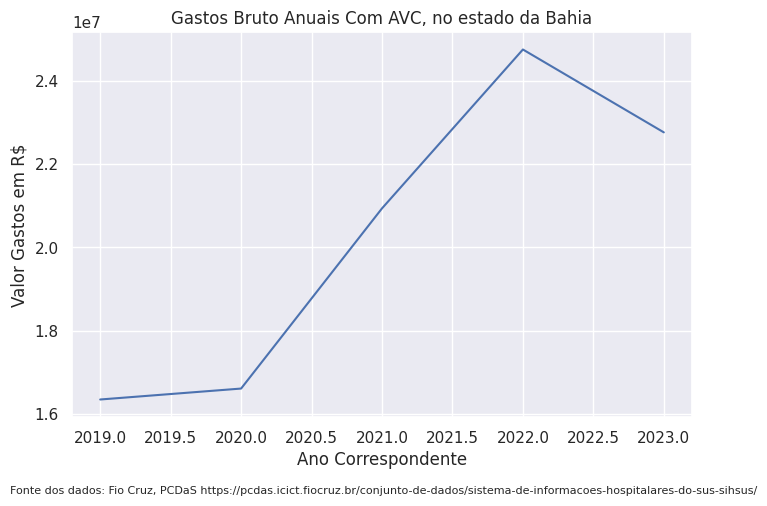

In [ ]:
sns.set_theme(style="darkgrid")
fig,ax= plt.subplots(figsize=(8,5))
plt.title('Gastos Bruto Anuais Com AVC, no estado da Bahia')
plt.ylabel('Valor Gastos em R$')
plt.xlabel('Ano Correspondente')
sns.lineplot(x=df_gastos2.index, y=df_gastos2['VAL_TOT'],ax=ax)

plt.text(x=-0.1, y=-0.2, s='Fonte dos dados: Fio Cruz, PCDaS https://pcdas.icict.fiocruz.br/conjunto-de-dados/sistema-de-informacoes-hospitalares-do-sus-sihsus/', fontsize=8, transform=ax.transAxes)
plt.show()

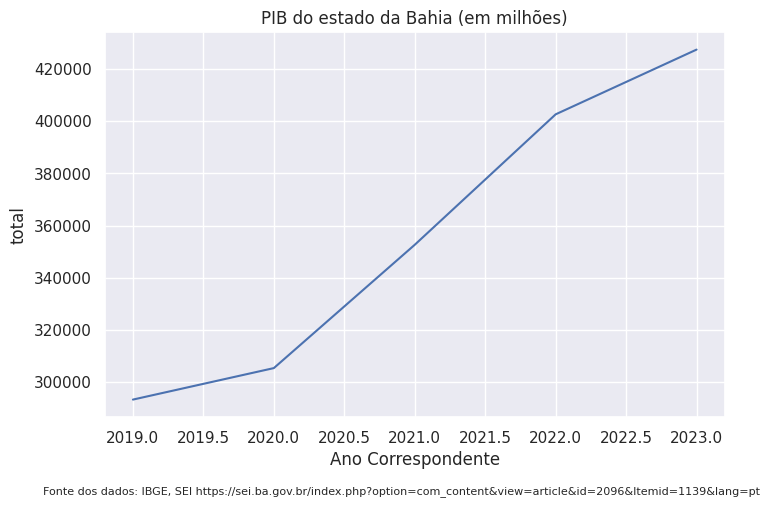

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('PIB do estado da Bahia (em milhões)')
plt.ylabel('total')
plt.xlabel('Ano Correspondente')

sns.lineplot(x=df_periodo_pib.index, y=df_periodo_pib, ax=ax)

plt.text(x=-0.1, y=-0.2, s='Fonte dos dados: IBGE, SEI https://sei.ba.gov.br/index.php?option=com_content&view=article&id=2096&Itemid=1139&lang=pt', fontsize=8, transform=ax.transAxes)
plt.show()

In [ ]:
df_fe=df_escolhidos.groupby(['def_idade_anos'], as_index=False)['def_diag_princ_cat'].sum()
df_fe

In [ ]:
sns.set_theme(style="darkgrid")
fig,ax= plt.subplots(figsize=(8,5))
plt.title('Os 10 maiores gastos por diagnostico em U$ na Bahia')
plt.ylabel('Diagnóstico')
plt.xlabel('Valor gasto em U$')
sns.histplot(x=df_escolhidos['def_idade_anos'], y=df_escolhidos, color='red' ,ax=ax)

bars[highlight].set_facecolor('red')
plt.text(x=-0.45, y=-0.2, s='Fonte dos dados: Fio Cruz, PCDaS https://pcdas.icict.fiocruz.br/conjunto-de-dados/sistema-de-informacoes-hospitalares-do-sus-sihsus/',
         fontsize=8, transform=ax.transAxes)

plt.show()